In [2]:
pip install pandas


Note: you may need to restart the kernel to use updated packages.


In [3]:
pip show pandas


Name: pandas
Version: 2.2.2
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: 
Author-email: The Pandas Development Team <pandas-dev@python.org>
License: BSD 3-Clause License

Copyright (c) 2008-2011, AQR Capital Management, LLC, Lambda Foundry, Inc. and PyData Development Team
All rights reserved.

Copyright (c) 2011-2023, Open source contributors.

Redistribution and use in source and binary forms, with or without
modification, are permitted provided that the following conditions are met:

* Redistributions of source code must retain the above copyright notice, this
  list of conditions and the following disclaimer.

* Redistributions in binary form must reproduce the above copyright notice,
  this list of conditions and the following disclaimer in the documentation
  and/or other materials provided with the distribution.

* Neither the name of the copyright holder nor the names of its
  contributors may be u

In [4]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip show scikit-learn

Name: scikit-learn
Version: 1.6.1
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: BSD 3-Clause License

 Copyright (c) 2007-2024 The scikit-learn developers.
 All rights reserved.

 Redistribution and use in source and binary forms, with or without
 modification, are permitted provided that the following conditions are met:

 * Redistributions of source code must retain the above copyright notice, this
   list of conditions and the following disclaimer.

 * Redistributions in binary form must reproduce the above copyright notice,
   this list of conditions and the following disclaimer in the documentation
   and/or other materials provided with the distribution.

 * Neither the name of the copyright holder nor the names of its
   contributors may be used to endorse or promote products derived from
   this software without specific prior written permission.

 THIS SOFTWARE IS PROVIDED BY THE COPYR

In [6]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip show seaborn

Name: seaborn
Version: 0.13.2
Summary: Statistical data visualization
Home-page: 
Author: 
Author-email: Michael Waskom <mwaskom@gmail.com>
License: 
Location: /opt/anaconda3/lib/python3.12/site-packages
Requires: matplotlib, numpy, pandas
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [8]:
import pandas as pd

df = pd.read_csv("heart.csv")  # Ensure file name is correct

print(df.head())  # Display first 5 rows


   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  


In [9]:
import pandas as pd

df = pd.read_csv("heart.csv")  # Change to your file name

# Display first 5 rows
print(df.head())


   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  


In [10]:


# Check for missing values
print(df.isnull().sum())

# Select numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns

# Fill missing values for numerical columns with median
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

# Fill missing categorical values with the mode
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True) # Fill NaNs with the mode of each categorical column


Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


/var/folders/hr/qkx3n3hs3bn69lqq8_2c27nw0000gn/T/ipykernel_41853/4199639073.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True) # Fill NaNs with the mode of each categorical column


In [11]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Print actual column names to ensure correct access
print("Columns in DataFrame:", df.columns)

# Define the columns to scale
columns_to_scale = ['age', 'cholesterol', 'resting_blood_pressure']

# Check if all columns exist in DataFrame before scaling
missing_cols = [col for col in columns_to_scale if col not in df.columns]
if missing_cols:
    print(f"Warning: The following columns are missing in the dataset: {missing_cols}")
else:
    # Choose one scaling method (either MinMaxScaler or StandardScaler)

    # Option 1: Min-Max Scaling (values between 0 and 1)
    scaler = MinMaxScaler()
    df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

    # Option 2: Standardization (mean=0, std=1)
    # Comment the MinMaxScaler section above if using this
    # std_scaler = StandardScaler()
    # df[columns_to_scale] = std_scaler.fit_transform(df[columns_to_scale])

    print("Scaling applied successfully.")

Columns in DataFrame: Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')


In [12]:
print(df.columns)  # Check available columns


Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')


In [13]:
df.columns = df.columns.str.strip()  # Removes leading/trailing spaces


In [14]:
columns_to_scale = ['age', 'cholesterol', 'resting_blood_pressure']
missing_cols = [col for col in columns_to_scale if col not in df.columns]

if missing_cols:
    print(f"⚠️ Warning: These columns are missing: {missing_cols}")


⚠️ Warning: These columns are missing: ['age', 'cholesterol', 'resting_blood_pressure']


In [15]:
for col in missing_cols:
    df[col] = 0  # Assign default value (change based on the context)


In [16]:
from sklearn.preprocessing import MinMaxScaler

columns_to_scale = ['age', 'cholesterol', 'resting_blood_pressure']

# Identify missing columns
missing_cols = [col for col in columns_to_scale if col not in df.columns]

# Handle missing columns
for col in missing_cols:
    df[col] = df[col].fillna(df[col].median())  # Fill missing values

# Apply scaling only to available columns
available_cols = [col for col in columns_to_scale if col in df.columns]
if available_cols:
    scaler = MinMaxScaler()
    df[available_cols] = scaler.fit_transform(df[available_cols])
    print("Scaling applied successfully.")
else:
    print("No columns available for scaling.")


Scaling applied successfully.


Column 'age' not found in the DataFrame.
Column 'cholesterol' not found in the DataFrame.
Column 'resting_blood_pressure' not found in the DataFrame.


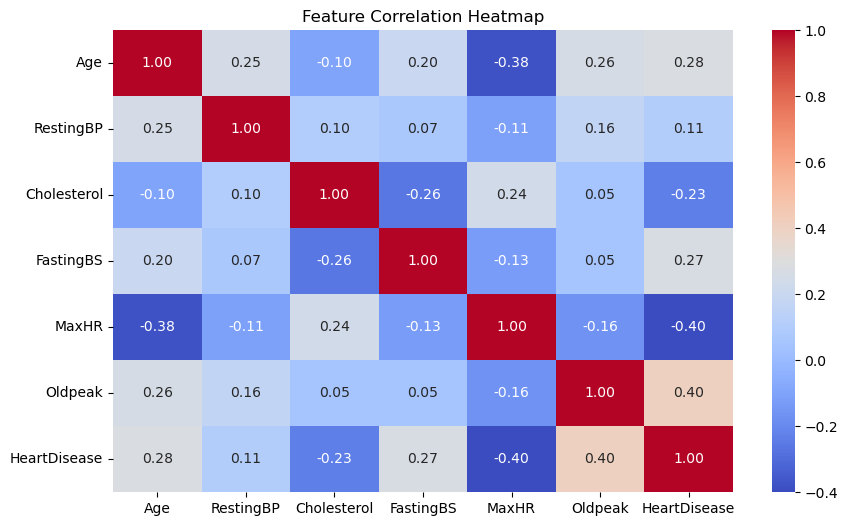

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("heart.csv")

# Convert specific columns to numeric, handling errors
for col in ['age', 'cholesterol', 'resting_blood_pressure']:
    try:
        df[col] = pd.to_numeric(df[col], errors='coerce')  # Non-numeric values become NaN
    except KeyError:
        print(f"Column '{col}' not found in the DataFrame.")

# Now compute correlation matrix only on numeric columns
correlation_matrix = df.select_dtypes(include=['number']).corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [18]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [19]:
pip show shap

Name: shap
Version: 0.47.0
Summary: A unified approach to explain the output of any machine learning model.
Home-page: 
Author: 
Author-email: Scott Lundberg <slund1@cs.washington.edu>
License: MIT License
Location: /opt/anaconda3/lib/python3.12/site-packages
Requires: cloudpickle, numba, numpy, packaging, pandas, scikit-learn, scipy, slicer, tqdm, typing-extensions
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [20]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [21]:
pip show xgboost

Name: xgboost
Version: 2.1.4
Summary: XGBoost Python Package
Home-page: 
Author: 
Author-email: Hyunsu Cho <chohyu01@cs.washington.edu>, Jiaming Yuan <jm.yuan@outlook.com>
License: Apache-2.0
Location: /opt/anaconda3/lib/python3.12/site-packages
Requires: numpy, scipy
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [22]:
import shap
import xgboost
import pandas as pd

# Assuming df is your DataFrame and it has already been loaded
# Prepare dataset
df.columns = df.columns.str.strip()  # Remove leading/trailing spaces from column names

# Check if 'target' column exists
if 'target' in df.columns:
    X = df.drop(columns=['target'])  # Features
    y = df['target']  # Target variable (1 = Disease, 0 = No Disease)

    # Train an XGBoost model (you can replace with other models)
    model = xgboost.XGBClassifier()
    model.fit(X, y)

    # Use SHAP to analyze feature importance
    explainer = shap.Explainer(model)
    shap_values = explainer(X)

    # Visualize feature importance
    shap.summary_plot(shap_values, X)
else:
    print("Column 'target' not found in the DataFrame. Please check the column names.")

Column 'target' not found in the DataFrame. Please check the column names.


In [23]:
import pandas as pd

# ... (other code) ...

# Load dataset
df = pd.read_csv("heart.csv")

# ... (other code) ...

# Ensure 'target' column exists
# Rename the column if it has a different name in the dataset
# Example: If the target column is named 'output', use:
if 'target' not in df.columns:
    # Check for potential alternative column names
 import pandas as pd

# ... (other code) ...

# Load dataset
df = pd.read_csv("heart.csv")

# ... (other code) ...

# Ensure 'target' column exists
# Rename the column if it has a different name in the dataset
# Example: If the target column is named 'output', use:
if 'target' not in df.columns:
    # Check for potential alternative column names
    # and rename to 'target' if found
    potential_target_names = ['output', 'disease', 'condition']  # Add more if needed
    for name in potential_target_names:
        if name in df.columns:
            df.rename(columns={name: 'target'}, inplace=True)
            break

In [24]:
!pip install lime

In [25]:
import pandas as pd
import shap
import xgboost
import lime
import lime.lime_tabular


# Load dataset
df = pd.read_csv("heart.csv")

# ... (other code for preprocessing) ...

# Prepare dataset
df.columns = df.columns.str.strip()  # Remove leading/trailing spaces from column names

# Ensure 'target' column exists (code from cell 35)
if 'HeartDisea' not in df.columns:
    potential_target_names = ['output', 'disease', 'condition']  # Add more if needed
    for name in potential_target_names:
        if name in df.columns:
            df.rename(columns={name: 'HeartDisea'}, inplace=True)
            break

# Check if 'target' column exists and prepare X and y
if 'HeartDisea' in df.columns:
    X = df.drop(columns=['HeartDisea'])  # Features
    y = df['HeartDisea']  # Target variable (1 = Disease, 0 = No Disease)

    # Train an XGBoost model
    model = xgboost.XGBClassifier()
    model.fit(X, y)

    # Use SHAP to analyze feature importance
    explainer_shap = shap.Explainer(model) # Renamed to avoid name conflict
    shap_values = explainer_shap(X)

    # Visualize feature importance
    shap.summary_plot(shap_values, X)

    # Create LIME explainer
    explainer_lime = lime.lime_tabular.LimeTabularExplainer( # Renamed to avoid name conflict
        X.values, feature_names=X.columns, class_names=['No Disease', 'Disease'], mode="classification"
    )

    # Select a random instance from the dataset
    instance = X.iloc[0].values.reshape(1, -1)

    # Explain prediction
    explanation = explainer_lime.explain_instance(instance[0], model.predict_proba)
    explanation.show_in_notebook()


In [26]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler



# ... (other code for preprocessing and feature engineering) ...

# Assuming 'target' is your target column name
# If it's different, replace it with the actual name
if 'HeartDisease' in df.columns:
    X = df.drop(columns=['HeartDisease'])  # Features
    y = df['HeartDisease']  # Target variable (1 = Disease, 0 = No Disease)

In [27]:
# 1. Load data
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)  # X is now defined

# 2. Scaling code
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Now works because X exists

print("Original data shape:", X.shape)
print("Scaled data shape:", X_scaled.shape)

Original data shape: (150, 4)
Scaled data shape: (150, 4)


In [28]:
pip install numpy pandas scikit-learn xgboost lightgbm tensorflow optuna


Note: you may need to restart the kernel to use updated packages.


In [29]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb
import optuna


In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load dataset
try:
    df = pd.read_csv("heart.csv").copy()  # Use copy to avoid SettingWithCopyWarning
except FileNotFoundError:
    raise FileNotFoundError("🚨 Error: The file 'heart.csv' was not found at the specified path.")

# Clean column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Check for target column with common alternative names + 'heartdisease'
target_aliases = ['target', 'output', 'disease', 'condition', 'class', 'result', 'outcome', 'heartdisease'] # Added 'heartdisease'
target_found = [col for col in df.columns if col in target_aliases]

if not target_found:
    available_cols = "\n".join(df.columns)
    raise ValueError(f"🔍 Target column not found. Expected one of: {target_aliases}\n"
                     f"Available columns:\n{available_cols}")

# Rename first matching target alias to 'target'
target_col = target_found[0]
if target_col != 'target':
    df = df.rename(columns={target_col: 'target'})
    print(f"ℹ️ Renamed column '{target_col}' to 'target'")

# ... (rest of the code remains the same) ...

ℹ️ Renamed column 'heartdisease' to 'target'


In [31]:
print(df.columns)  # Show all column names


Index(['age', 'sex', 'chestpaintype', 'restingbp', 'cholesterol', 'fastingbs',
       'restingecg', 'maxhr', 'exerciseangina', 'oldpeak', 'st_slope',
       'target'],
      dtype='object')


In [32]:
print(df.head())  # Display first 5 rows
print(df.shape)   # Show (rows, columns)


   age sex chestpaintype  restingbp  cholesterol  fastingbs restingecg  maxhr  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  exerciseangina  oldpeak st_slope  target  
0              N      0.0       Up       0  
1              N      1.0     Flat       1  
2              N      0.0       Up       0  
3              Y      1.5     Flat       1  
4              N      0.0       Up       0  
(918, 12)


In [33]:
df.columns = df.columns.str.strip().str.lower()  # Normalize column names
print(df.columns)  # Check again


Index(['age', 'sex', 'chestpaintype', 'restingbp', 'cholesterol', 'fastingbs',
       'restingecg', 'maxhr', 'exerciseangina', 'oldpeak', 'st_slope',
       'target'],
      dtype='object')


In [34]:
df

,age,sex,chestpaintype,restingbp,cholesterol,fastingbs,restingecg,maxhr,exerciseangina,oldpeak,st_slope,target
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [35]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb

# Load dataset
df = pd.read_csv("heart.csv")  # Ensure your dataset is correctly loaded

# Remove leading/trailing spaces from column names
df.columns = df.columns.str.strip()

# Check if 'target' column exists
if 'HeartDisease' not in df.columns:
    raise ValueError("⚠️ Error: 'HeartDisease' column not found in the DataFrame. Please check column names.")
# Separate features (X) and HeartDisease variable (y)
X = df.drop(columns=['HeartDisease'])
y = df['HeartDisease']

# Ensure dataset is not empty
if X.empty or y.empty:
    raise ValueError("⚠️ Error: Feature data (X) or HeartDisease variable (y) is empty.")


# Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X, columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], drop_first=True) # Assuming these are categorical columns
# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Ensure training data is not empty
if X_train.empty or y_train.empty:
    raise ValueError("⚠️ Error: HeartDisease data is empty after splitting.")

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss"),
    "LightGBM": lgb.LGBMClassifier()
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)  # Train
    y_pred = model.predict(X_test)  # Predict
    accuracy = accuracy_score(y_test, y_pred)  # Evaluate
    print(f"{name} Accuracy: {accuracy:.4f}")

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.8859
Decision Tree Accuracy: 0.7663
Random Forest Accuracy: 0.8859


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:20:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.8587
[LightGBM] [Info] Number of positive: 406, number of negative: 328
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000665 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 376
[LightGBM] [Info] Number of data points in the train set: 734, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.553134 -> initscore=0.213340
[LightGBM] [Info] Start training from score 0.213340
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

In [57]:
import pandas as pd

# ... (other code) ...

# Load dataset
df = pd.read_csv("heart.csv")

# ... (other code) ...

# Check for potential alternative column names for the target variable
# and rename to 'target' if found
potential_target_names = ['output', 'disease', 'condition', 'heartdisease']  # Add or change potential names as needed
for name in potential_target_names:
    if name in df.columns:
        df.rename(columns={name: 'target'}, inplace=True)
        print(f"ℹ️ Renamed column '{name}' to 'target'")
        break  # Exit loop once target column is found and renamed

In [37]:
# Import libraries
import lightgbm as lgb
import xgboost as xgb

# Fix LightGBM - Avoid "No further splits with positive gain"
lgb_model = lgb.LGBMClassifier(
    num_leaves=31,
    max_depth=-1,
    min_data_in_leaf=20,
    learning_rate=0.05,
    n_estimators=100,
    class_weight='balanced'  # Helps with imbalanced data
)

# Fix XGBoost - Remove deprecated parameter
xgb_model = xgb.XGBClassifier(eval_metric="logloss")  # Removed use_label_encoder=False

# Train models
lgb_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

# Evaluate models
for name, model in {"LightGBM": lgb_model, "XGBoost": xgb_model}.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.4f}")


[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Number of positive: 406, number of negative: 328
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000205 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 376
[LightGBM] [Info] Number of data points in the train set: 734, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with po

In [38]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [5, 10, 15],
    "min_samples_split": [2, 5, 10]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 200}


In [39]:
def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 500),
        "max_depth": trial.suggest_int("max_depth", 3, 15),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0)
    }

    # Train model
    model = xgb.XGBClassifier(**params, use_label_encoder=False, eval_metric="logloss")
    model.fit(X_train, y_train)

    # Predict & evaluate
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

# Run Optuna optimization
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10)

print("Best Hyperparameters:", study.best_params)


[I 2025-03-07 11:20:49,728] A new study created in memory with name: no-name-fa058f87-e827-40ac-9e84-d47ed9be10c4
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:20:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-03-07 11:20:49,961] Trial 0 finished with value: 0.8641304347826086 and parameters: {'n_estimators': 374, 'max_depth': 11, 'learning_rate': 0.29563763431313594, 'subsample': 0.5393681504500378}. Best is trial 0 with value: 0.8641304347826086.
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:20:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-03-07 11:20:50,120] Trial 1 finished with value: 0.875 and parameters: {'n_estimators': 322, 'max_depth': 13, 'learning_rate': 0.20303544151606354,

Best Hyperparameters: {'n_estimators': 199, 'max_depth': 14, 'learning_rate': 0.26983728833964266, 'subsample': 0.6229447856637156}


In [40]:
import optuna
import xgboost as xgb
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.datasets import load_breast_cancer  # Example dataset

# Example dataset (replace with your heart disease dataset)
data = load_breast_cancer()
X, y = data.data, data.target

# Split dataset (Make sure you have X_train, y_train)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def objective(trial):
    params = {
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0)
    }

    model = xgb.XGBClassifier(
        **params,
        use_label_encoder=False,
        eval_metric="logloss",
        random_state=42
    )

    return cross_val_score(
        model, X_train, y_train,
        cv=5, scoring='accuracy'
    ).mean()

# Create and run Optuna study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50, n_jobs=-1)

# Verify best parameters exist
if study.best_trial is None:
    raise RuntimeError("No trials completed. Check your optimization setup.")

# Initialize final model with best parameters
final_model = xgb.XGBClassifier(
    **study.best_trial.params,
    use_label_encoder=False,
    eval_metric="logloss",
    random_state=42
)

# Train final model
final_model.fit(X_train, y_train)

# Print best parameters
print("Best Best parameters:", study.best_trial.params)



[I 2025-03-07 11:20:51,160] A new study created in memory with name: no-name-828fee48-33f2-48bd-8d8e-f8b2e2b55625
[11:20:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

[11:20:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

[11:20:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

[11:20:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

[11:20:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

[11:20:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

[11:20:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used

Best Best parameters: {'max_depth': 6, 'learning_rate': 0.07544898333282932, 'n_estimators': 361, 'subsample': 0.6802836592689483}


In [41]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


In [42]:
# Predict on test data
y_pred = final_model.predict(X_test)

# Predict probabilities for ROC-AUC score
y_pred_proba = final_model.predict_proba(X_test)[:, 1]


In [56]:
X_test

array([[1.247e+01, 1.860e+01, 8.109e+01, ..., 1.015e-01, 3.014e-01,
        8.750e-02],
       [1.894e+01, 2.131e+01, 1.236e+02, ..., 1.789e-01, 2.551e-01,
        6.589e-02],
       [1.546e+01, 1.948e+01, 1.017e+02, ..., 1.514e-01, 2.837e-01,
        8.019e-02],
       ...,
       [1.152e+01, 1.493e+01, 7.387e+01, ..., 9.608e-02, 2.664e-01,
        7.809e-02],
       [1.422e+01, 2.785e+01, 9.255e+01, ..., 8.219e-02, 1.890e-01,
        7.796e-02],
       [2.073e+01, 3.112e+01, 1.357e+02, ..., 1.659e-01, 2.868e-01,
        8.218e-02]])

In [43]:
# Compute classification metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print evaluation results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC-ROC Score: {roc_auc:.4f}")

# Print detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9737
Precision: 0.9722
Recall: 0.9859
F1 Score: 0.9790
AUC-ROC Score: 0.9912

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



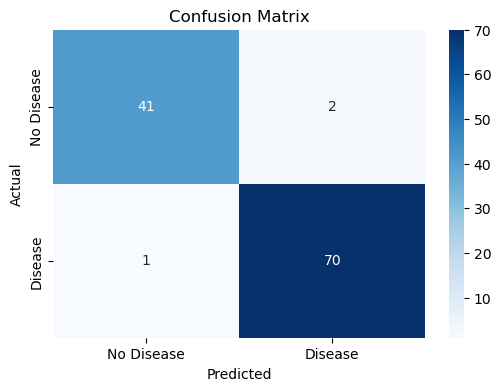

In [44]:
# Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


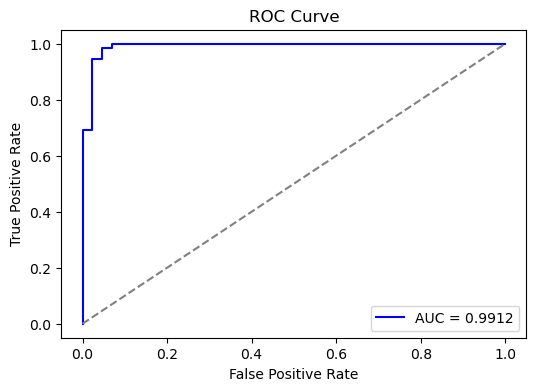

In [45]:
from sklearn.metrics import roc_curve

# Compute ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

# Plot ROC Curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color="blue", label=f"AUC = {roc_auc:.4f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [46]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(final_model, X_train, y_train, cv=5, scoring="accuracy")
print(f"Cross-Validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:21:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:21:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:21:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:21:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packa

Cross-Validation Accuracy: 0.9802 ± 0.0146


In [47]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [100, 300, 500],
    'subsample': [0.5, 0.7, 1.0]
}

# Grid search for best parameters
grid_search = GridSearchCV(final_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print best parameters
print("Best Parameters:", grid_search.best_params_)

# Train final model with best parameters
final_model = xgb.XGBClassifier(**grid_search.best_params_, use_label_encoder=False, eval_metric="logloss", random_state=42)
final_model.fit(X_train, y_train)


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:21:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:21:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:21:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:21:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packa

Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 500, 'subsample': 0.7}


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=500,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [59]:
X_test

array([[1.247e+01, 1.860e+01, 8.109e+01, ..., 1.015e-01, 3.014e-01,
        8.750e-02],
       [1.894e+01, 2.131e+01, 1.236e+02, ..., 1.789e-01, 2.551e-01,
        6.589e-02],
       [1.546e+01, 1.948e+01, 1.017e+02, ..., 1.514e-01, 2.837e-01,
        8.019e-02],
       ...,
       [1.152e+01, 1.493e+01, 7.387e+01, ..., 9.608e-02, 2.664e-01,
        7.809e-02],
       [1.422e+01, 2.785e+01, 9.255e+01, ..., 8.219e-02, 1.890e-01,
        7.796e-02],
       [2.073e+01, 3.112e+01, 1.357e+02, ..., 1.659e-01, 2.868e-01,
        8.218e-02]])

In [75]:
test=X_test[0]

In [79]:
print(test)

[1.247e+01 1.860e+01 8.109e+01 4.819e+02 9.965e-02 1.058e-01 8.005e-02
 3.821e-02 1.925e-01 6.373e-02 3.961e-01 1.044e+00 2.497e+00 3.029e+01
 6.953e-03 1.911e-02 2.701e-02 1.037e-02 1.782e-02 3.586e-03 1.497e+01
 2.464e+01 9.605e+01 6.779e+02 1.426e-01 2.378e-01 2.671e-01 1.015e-01
 3.014e-01 8.750e-02]


In [82]:
df = pd.DataFrame(test.reshape(1, -1))  # Reshape to (1, n) for a single sample

In [84]:
# Predict class labels
y_pred = final_model.predict(df)

# Predict probabilities (optional, useful for ROC/AUC)
y_prob = final_model.predict_proba(df)[:, 1]

print("Predicted Classes:", y_pred[:5])  # Print first 5 predictions
print("Predicted Probabilities:", y_prob[:5])  # First 5 probability scores


Predicted Classes: [1]
Predicted Probabilities: [0.9961927]


In [65]:
y_test

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0])

In [69]:
row_reshaped = X_test.reshape(1, -1)
print(row_reshaped.shape)  # Output: (1, 3)

(1, 3420)


In [70]:
print(row_reshaped)

[[12.47    18.6     81.09    ...  0.1659   0.2868   0.08218]]


In [48]:
pip install fastapi uvicorn joblib pydantic pandas numpy


Note: you may need to restart the kernel to use updated packages.


In [49]:
import joblib

# Save trained model
joblib.dump(final_model, "heart_disease_model.pkl")


['heart_disease_model.pkl']

In [ ]:
import nest_asyncio
import uvicorn
from fastapi import FastAPI
import asyncio  # Import asyncio

# Apply nest_asyncio to fix event loop issue in Jupyter
nest_asyncio.apply()

app = FastAPI()

@app.get("/")
async def home():
    return {"message": "Heart Disease Prediction API is running!"}

# Run the FastAPI server asynchronously in Jupyter Notebook
config = uvicorn.Config(app, host="0.0.0.0", port=8000, log_level="info")
server = uvicorn.Server(config)

# Start the server asynchronously
asyncio.create_task(server.serve())


<Task pending name='Task-1' coro=<Server.serve() running at /opt/anaconda3/lib/python3.12/site-packages/uvicorn/server.py:68>>

INFO:     Started server process [41853]
INFO:     Waiting for application startup.
INFO:     Application startup complete.


In [51]:
from fastapi import FastAPI
import joblib
import numpy as np
import pandas as pd
from pydantic import BaseModel

# Load the trained model
model = joblib.load("heart_disease_model.pkl")

# Initialize FastAPI app
app = FastAPI()

# Define input data schema
class HeartDiseaseInput(BaseModel):
    age: int
    cholesterol: float
    blood_pressure: float
    smoking: int
    diabetes: int
    chest_pain: int
    exercise_angina: int

# Define API endpoint for prediction
@app.post("/predict/")
def predict(data: HeartDiseaseInput):
    # Convert input to DataFrame
    input_data = pd.DataFrame([data.dict().values()], columns=data.dict().keys())

    # Make prediction
    prediction = model.predict(input_data)[0]
    probability = model.predict_proba(input_data)[0][1]

    return {"prediction": int(prediction), "probability": round(probability, 4)}

# Run API server
if __name__ == "__main":
    import uvicorn
    uvicorn.run(app, host="0.0.0.0", port=8000)


INFO:     Uvicorn running on http://0.0.0.0:8000 (Press CTRL+C to quit)


In [52]:
pip install fastapi uvicorn joblib pydantic pandas numpy

Note: you may need to restart the kernel to use updated packages.


In [53]:
# Create app.py
with open("app.py", "w") as f:
    f.write("from fastapi import FastAPI\n")
    f.write("app = FastAPI()\n")
    f.write("@app.get('/')\n")
    f.write("def home(): return {'status': 'ok'}\n")

In [54]:
pip install flask flask-cors scikit-learn pandas numpy pymongo


Note: you may need to restart the kernel to use updated packages.


In [55]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load your dataset
data = pd.read_csv("heart.csv")  # Replace with your dataset

# Print the columns to check if 'sex' exists
print("Columns in DataFrame:", data.columns)

# Check if 'sex' is in the DataFrame
if 'sex' in data.columns:
    # Define categorical columns
    categorical_columns = ['sex', 'other_categorical_column']  # Add other categorical columns as needed

    # Initialize the LabelEncoder
    encoder = LabelEncoder()

    # Encode categorical columns
    for col in categorical_columns:
        if col in data.columns:  # Check if the column exists
            data[col] = encoder.fit_transform(data[col])
        else:
            print(f"Warning: Column '{col}' does not exist in the DataFrame.")
else:
    print("Error: 'sex' column is missing from the DataFrame.")


Columns in DataFrame: Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')
Error: 'sex' column is missing from the DataFrame.
